<a href="https://colab.research.google.com/github/Ulugbek9403/ml_edu/blob/master/notebooks/23_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Классификация - анализ данных

> 🚀 В этой практике нам понадобятся: `numpy==1.26.4, pandas==2.2.2, seaborn==0.13.2`

> 🚀 Установить вы их можете с помощью команды: `%pip install numpy==1.26.4 pandas==2.2.2 seaborn==0.13.2`


## Содержание

* [Смотрим данные](#Смотрим-данные)
* [Самое простое, но очень важное!](#Самое-простое,-но-очень-важное)
* [Цветовая разметка](#Цветовая-разметка)
* [Небольшое задание](#Небольшое-задание)
* [Вопросы для закрепления](#Вопросы-для-закрепления)
* [Полезные ссылки](#Полезные-ссылки)


В этой практике мы будем знакомиться с дополнительными способами анализа данных и тем расширять наш инструментарий!



In [1]:
# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
import numpy as np
import pandas as pd
import random
import matplotlib.pyplot as plt
import seaborn as sns
TEXT_COLOR = "black"

plt.rcParams["figure.figsize"] = (15, 10)
plt.rcParams["text.color"] = TEXT_COLOR
plt.rcParams["font.size"] = 14
plt.rcParams["lines.markersize"] = 15
plt.rcParams["axes.labelcolor"] = TEXT_COLOR
plt.rcParams["xtick.color"] = TEXT_COLOR
plt.rcParams["ytick.color"] = TEXT_COLOR

sns.set_style("darkgrid")

# Зафиксируем состояние случайных чисел
RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
random.seed(RANDOM_SEED)

## Смотрим данные

В отличии от предыдущего ноутбука, где мы смотрели основы анализа данных, наша целевая переменная поменяла тип с **числовой** на **категориальную**.

Для разбора мы будем использовать настоящий датасет [Iris](https://www.kaggle.com/uciml/iris) - тянем с Kaggle файл Iris.csv и открываем его.

In [3]:
# Если вы откроете файл в первый раз и посмотрите на данные - вы увидите, что колокна Id содержит только уникальные числовые значения, а значит - прямой кандидат на индексную колонку
df_src = pd.read_csv("Iris.csv", index_col=0)

In [5]:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [4]:
df_src

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
146,6.7,3.0,5.2,2.3,Iris-virginica
147,6.3,2.5,5.0,1.9,Iris-virginica
148,6.5,3.0,5.2,2.0,Iris-virginica


Мы видим, что пропусков в данных нет, найдена индексная колонка Id, имеются пять переменных, из них четыре числовых и независимых и одна целевая категориальная. Посмотрим на категории целевой колонки:

In [6]:
df_src["Species"].value_counts()

,count
Species,
Iris-setosa,50
Iris-versicolor,50
Iris-virginica,50


В данных нет дисбаланса, но колонка, в которой явно выделяется категориальная переменная, имеет тип object.

> ⚠️ В работе с данными очень важно правильно понимать смысл переменных и их типы.

Приведём тип целевой переменной к категориальной:

In [7]:
df_src["Species"] = df_src["Species"].astype("category")
# И посмотрим типы теперь:
df_src.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   SepalLengthCm  150 non-null    float64 
 1   SepalWidthCm   150 non-null    float64 
 2   PetalLengthCm  150 non-null    float64 
 3   PetalWidthCm   150 non-null    float64 
 4   Species        150 non-null    category
dtypes: category(1), float64(4)
memory usage: 10.2 KB


Из описания видно, что в наборе данных четыре признака, каждый признак представлен в единицах измерения [см] - это значит, что все признаки числовые (вещественные).

Суть этих числовых признаков - измерение параметров листков цветка (см. рисунок ниже).

Целевыми классами являются три разновидности ирисов:
- setosa
- versicolor
- virginica

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/iris.png" width=900/></p>

Отлично, на первый взгляд, типы приведены правильно и - да начнётся анализ!

## Самое простое, но очень важное!

Конечно, на первый взгляд может показаться бессмысленным рисовать такой график, но даже визуализация простого `value_counts()` в виде гистограммы - очень полезно для восприятия, особенно, когда имеется много классов!

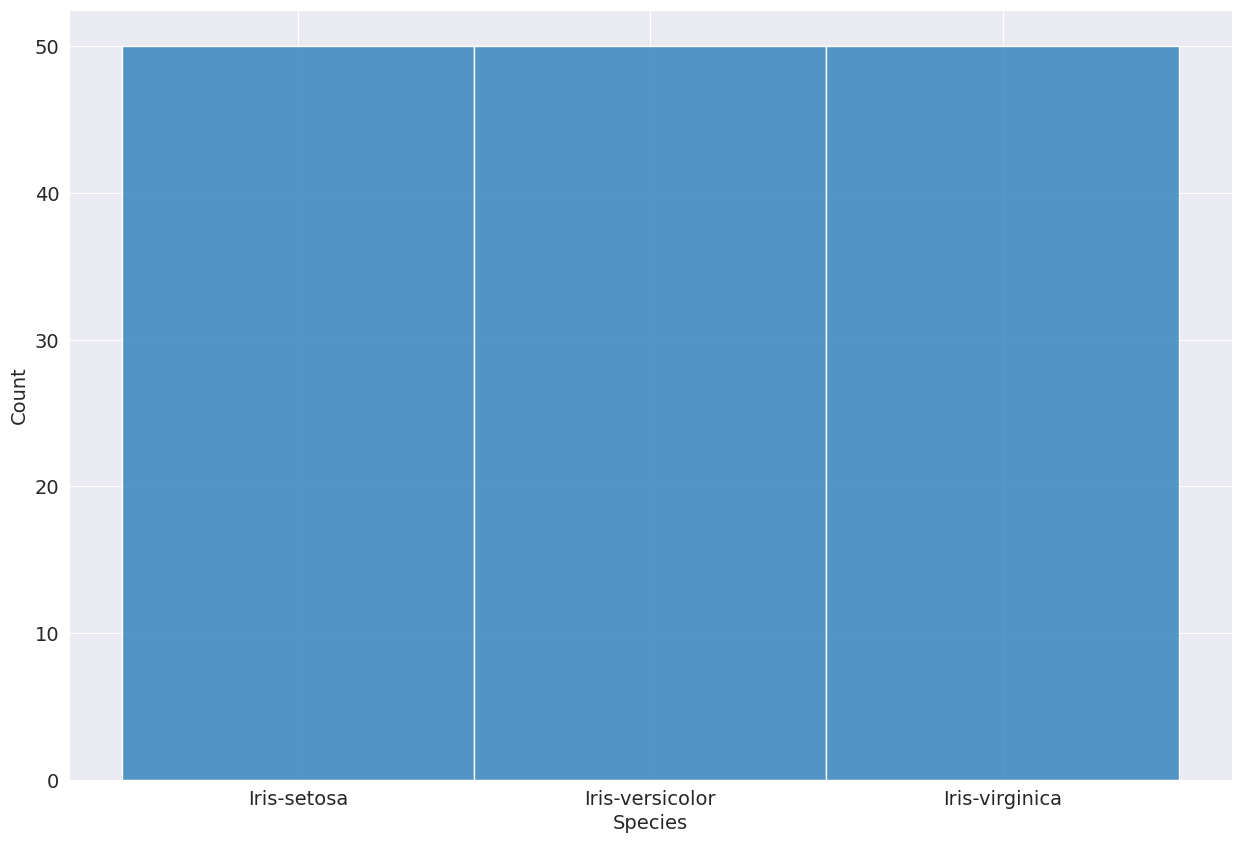

In [8]:
sns.histplot(df_src, x="Species")
plt.show()

Отлично, здесь мы видим, что количество примеров в данных равно и нет никаких перекосов в количествах. Простое действие, но может помочь в ряде случаев!

## Цветовая разметка

Наличие категориальной переменной (не только в качестве целевой), позволяет применять помимо различных визуализаций в осях XY ещё и цветовую разметку под названием Hue!

Давайте попробуем посмотреть, как будет выглядеть PairPlot в разметке с учётом категорий целевой переменной:

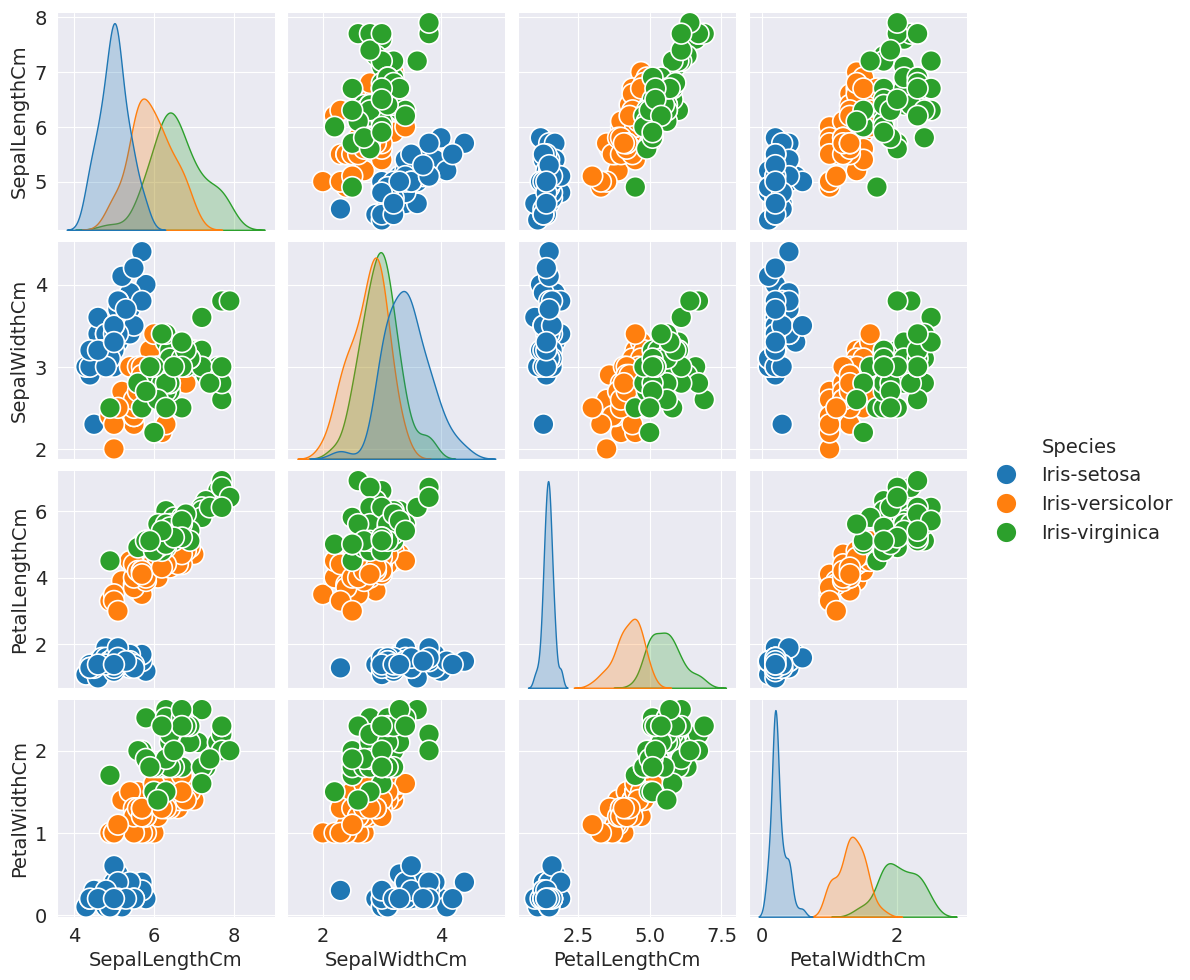

In [9]:
sns.pairplot(df_src, hue="Species")
plt.show()

Как видите, цветовой разметкой можно отмечать как распределение переменных, так и Scatter графики пересечений признаков.

Давайте вспомним, что основной целью задачи классификации является *поиск такого разделения в гиперплоскости признаков, которое позволило бы как можно точнее отделить целевые классы друг от друга*.

Так вот обратите внимание на признаки PetalLengthCm и PetalWidthCm, по ним очень хорошо отделяется класс Setosa!

То есть, мы простым анализом распределения точек смогли понять, как мы можем без обучения предсказывать, является ли ирис разновидностью Setosa или нет.

Давайте, чтобы точно определить порог, посмотрим на увеличенный график распределения PetalWidthCm:

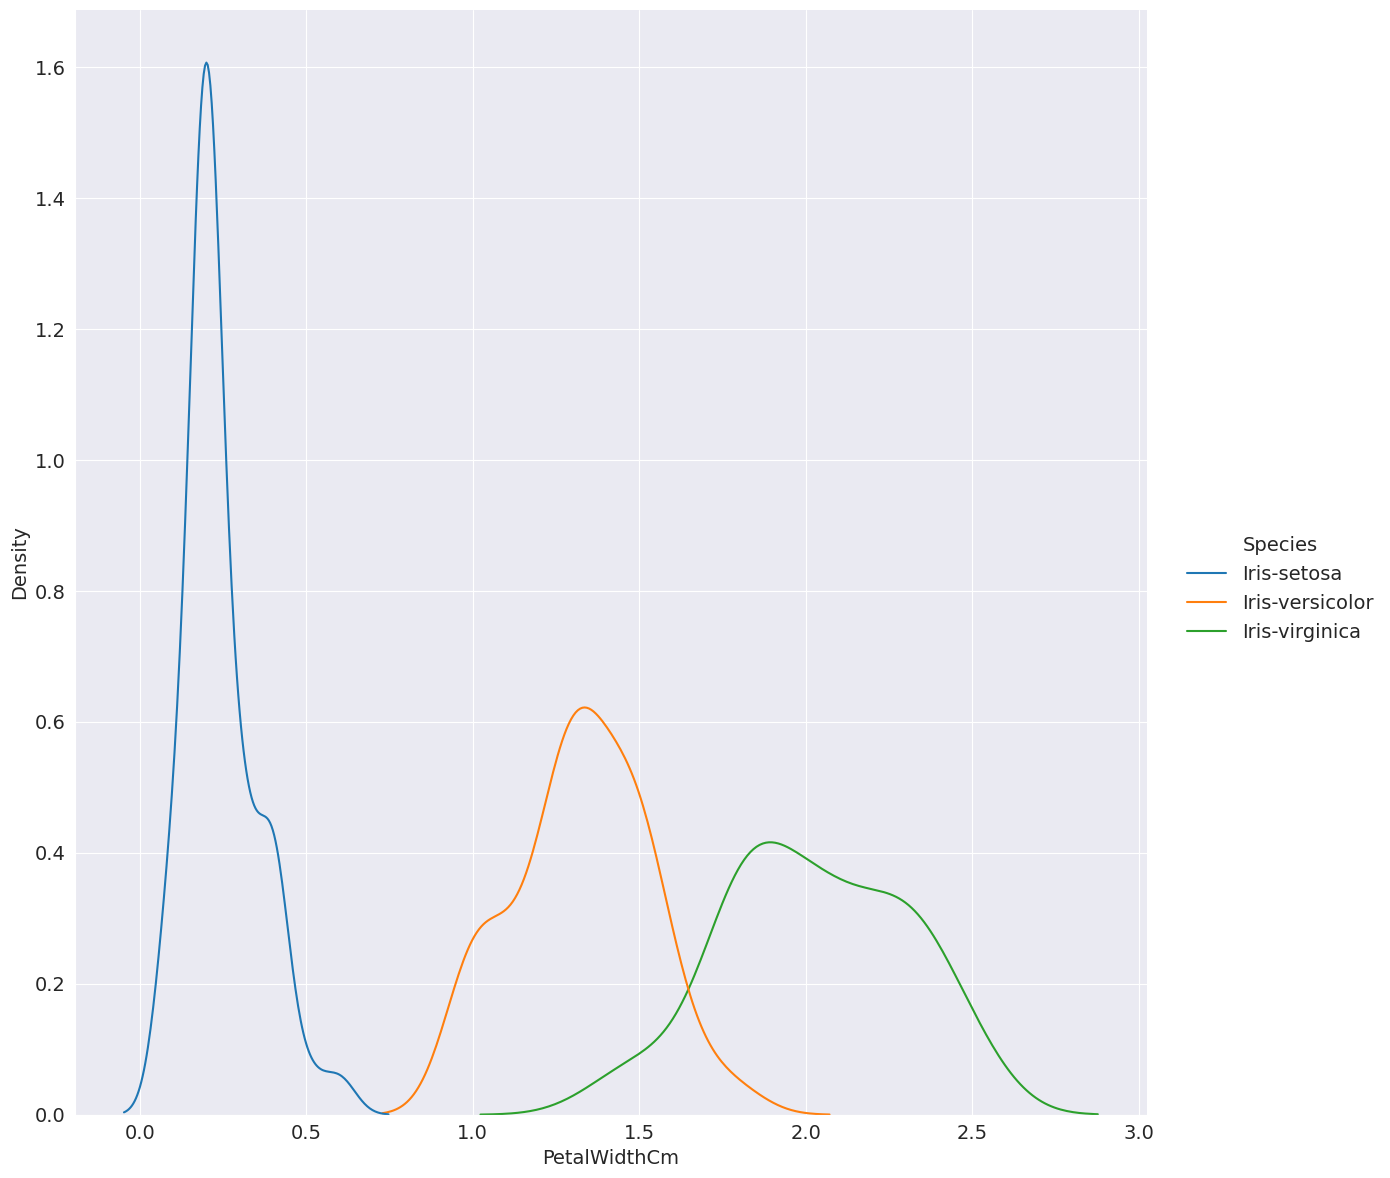

In [10]:
sns.displot(df_src, x="PetalWidthCm", hue="Species", kind="kde", height=12)
plt.show()

Отлично, давайте, чтобы убедиться в своей теории, попробуем разделить данные на два набора и посмотреть уникальные классы:

In [11]:
df_src.loc[df_src["PetalWidthCm"] > 0.75, "Species"].value_counts()

,count
Species,
Iris-versicolor,50
Iris-virginica,50
Iris-setosa,0


In [12]:
df_src.loc[df_src["PetalWidthCm"] <= 0.75, "Species"].value_counts()


,count
Species,
Iris-setosa,50
Iris-versicolor,0
Iris-virginica,0


Смотрите, действительно, просто взяв определенный порог, можно без обучения модели предсказывать конкретный факт - в этом сила визуализации, без неё выяснить такое было бы невозможно!

Посмотрим ещё пару интересных графиков, которые позволяют оценить распределения:

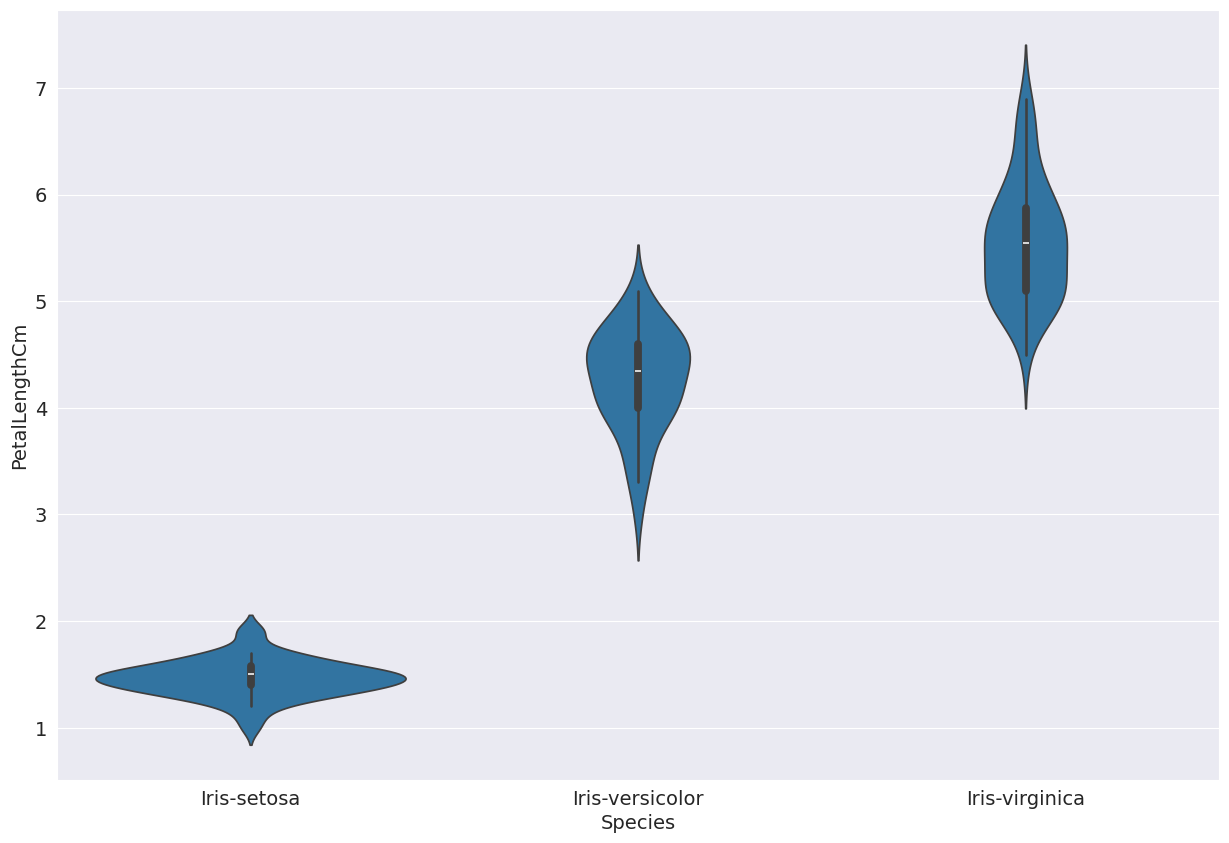

In [13]:
sns.violinplot(data=df_src, x="Species", y="PetalLengthCm")
plt.show()

Это график сриптки (скрипок), который отражает распределения, но в немного другом виде.

Как видите, тут можно лучше разделить распределения в отличии от `displot()`. Более статистически наполненным информацией является график `boxplot()`:

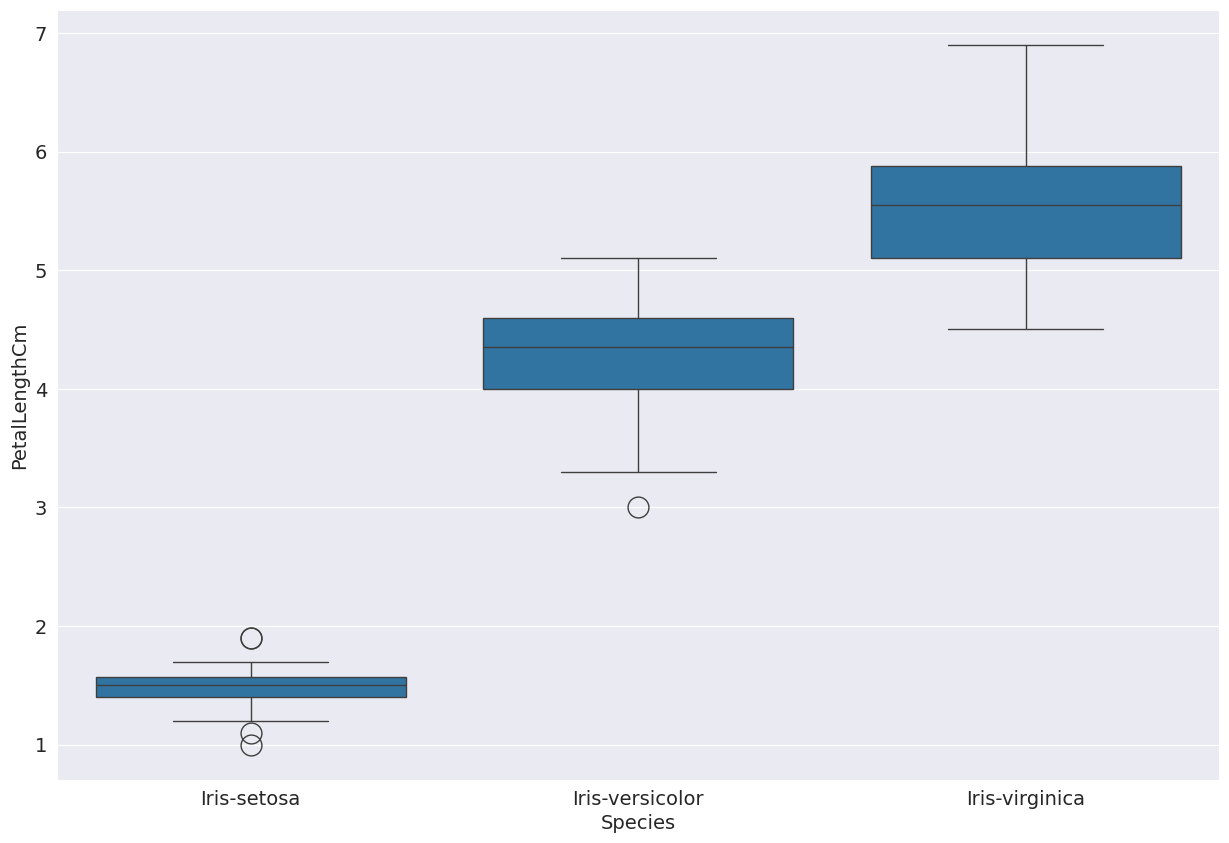

In [14]:
sns.boxplot(data=df_src, x="Species", y="PetalLengthCm")
plt.show()

Если график скрипок просто показывает KDE, но в другой плоскости, то Boxplot отображает ряд интересных характеристик:

> 🤓 Не путайте график "ящика с усами" со свечой, которая применяется на бирже в торговле акциями!

<p align="center"><img src="https://raw.githubusercontent.com/AleksDevEdu/ml_edu/master/assets/distributions.png" width=500/></p>

На нём можно увидеть ряд статистических характеристик:
- медиана;
- наблюдаемые минимум и максимум (не путать с обычными минимумом и максимумом данных);
- 1-й и 3-й квартили (нижний и верхний);
- статистические выбросы.

Такой график очень полезен для анализа, но не стоит реагировать на "выбросы", как на то, что надо сразу удалять!

Но даже на нашем представлении мы видим, что по этому признаку PetalLengthCm медианы классов Versicolor и Virginica находятся на разных уровнях, а значит признак может быть полезен для классификации! Мы уже не говорим про отделимость Setosa по этому признаку.

## Небольшое задание

В целом, вот такой небольшой набор инструментов предлагается положить себе в карман!

Если у вас есть азарт, то можете попытаться разработать модель для этого датасета, чтобы добиться наибольших показателей по метрикам. Не забудьте сначала выделить **тестовую** выборку со стратификацией!

## Вопросы для закрепления

А теперь пара вопросов, чтобы закрепить материал!

1. Чем хорош Boxplot?
2. Зачем нужна цветовая разметка по классам? Неужели нельзя посмотреть на исходные данные без цветов?
3. Как будет выглядеть гистограмма количества примеров в датасете с дисбалансом классов?
4. Что показывает график KDE?
5. Как на скрипках увидеть дисбаланс классов?

## Полезные ссылки
* [Boxplots are Awesome от StatQuest](https://www.youtube.com/watch?v=fHLhBnmwUM0)
* [Understanding Boxplots от Towards DS](https://towardsdatascience.com/understanding-boxplots-5e2df7bcbd51)
* [The Normal Distribution от StatQuest](https://www.youtube.com/watch?v=rzFX5NWojp0)
* [The Main Ideas behind Probability Distributions](https://www.youtube.com/watch?v=oI3hZJqXJuc)
